
Набор данных по цветкам ириса или набор данных по ирисам Фишера - это многомерный набор данных, представленный британским статистиком и биологом Рональдом Фишером в его работе 1936 года «Использование множественных измерений в таксономических проблемах» в качестве примера линейного дискриминантного анализа.

Этот знаменитый набор данных по ирисам содержит измерения в сантиметрах переменных длины и ширины чашелистика и длины и ширины лепестка, соответственно, для 50 цветков каждого из 3 видов ирисов. Эти виды - Iris setosa, versicolor и virginica. На основе комбинации этих четырех признаков Фишер разработал модель для отличия видов друг от друга.

Набор данных содержит 150 записей по 5 признакам.

1. длина чашелистика в см
2. ширина чашелистика в см
3. длина лепестка в см
4. ширина лепестка в см
5. Виды:  
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

Ваша цель на сегодня - научиться отличать их друг от друга

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Данные


Загрузите в колаб файл iris.csv и давайте посмотрим на первые несколько строк

In [6]:
iris_data = pd.read_csv('iris.csv')

iris_data.columns = ['sepal_length', 'sepal_width' , 'petal_length', 'petal_width', 'species']

iris_data.head(10)


FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

Размер нашего датасета:

In [ ]:
iris_data.shape

(149, 5)

In [ ]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
print(iris_data.groupby('species').size())

species
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Видим, что у нас сбалансированный датасет

Посчитайте минимальные и максимальные значения по каждому из признаков, среднее значение и медиану

In [ ]:
# ваш код

Используя describe функцию и transpose выведите таблицу со всей информацией по каждому из 4 признаков (У вас должна получиться таблица с 4 строками)

In [ ]:
# ваш код

Построим боксплот чтобы посмотреть на наличие выборосов

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение длины чашелистика"

sns.boxplot(x="species", y="sepal_length", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение ширины чашелистика"

sns.boxplot(x="species", y="sepal_width", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение длины лепестков"

sns.boxplot(x="species", y="petal_length", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Распределение ширины лепестков"

sns.boxplot(x="species", y="petal_width", data=iris_data)

# increasing font size
plt.title(title, fontsize=26)
plt.show()

Что вы видите? Различаются ли эти характеристики у разных видов ирисов?

Теперь сравним лепестки между собой

In [ ]:
from bokeh.plotting import figure, output_file, show
output_file("test1.html")

color1 = '#fcc5c0'
color2 = '#f768a1'
color3 = '#7a0177'

#adding colors
colormap = {'Iris-setosa': color1, 'Iris-versicolor': color2, 'Iris-virginica': color3}
colors = [colormap[x] for x in iris_data['species']]

#adding labels
p = figure(title = "Petal Width and Petal Length")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'
p.legend.location = "top_left"

p.diamond(iris_data["petal_length"], iris_data["petal_width"],color=colors, fill_alpha=0.2, size=10)


show(p)

# Сравним ширину лепестков и длину чашелистика у разных видов

In [ ]:
from bokeh.plotting import figure, output_file, show
output_file("test2.html")

#adding colors
colormap = {'Iris-setosa': color1, 'Iris-versicolor': color2, 'Iris-virginica': color3}
colors = [colormap[x] for x in iris_data['species']]

#adding labels
p = figure(title = "Petal Width and Sepal Length")
p.xaxis.axis_label = 'Sepal Length'
p.yaxis.axis_label = 'Petal Width'


p.circle(iris_data["sepal_length"], iris_data["petal_width"],
         color=colors, fill_alpha=0.2, size=10)


show(p)

# Построим Pairplot
чтобы посмотреть на то как относятся друг к другу различные признаки

In [ ]:

import seaborn as sns
sns.pairplot(iris_data, hue="species", palette="GnBu_d", markers=["o", "s", "D"])

sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:

import seaborn as sns
sns.set(style="whitegrid")

sns.pairplot(iris_data, hue="species", palette="GnBu_d", diag_kind="kde", markers=["o", "s", "D"])

sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

iris2 = pd.melt(iris_data, "species", var_name="measurement")

sns.swarmplot(x="measurement", y="value", hue="species",palette="GnBu_d", data=iris2)

sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(x="species", y="petal_length", palette="GnBu_d", data=iris_data)
sns.despine()
import matplotlib.pyplot as plt
plt.show()


In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

sns.violinplot(x="species", y="petal_width", palette="GnBu_d", data=iris_data)
sns.despine()

import matplotlib.pyplot as plt
plt.show()

In [ ]:
import matplotlib.pyplot as plt
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# KNN

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

Посмотрим на данные еще раз, убедимся что с ними все ок

In [ ]:
print(iris.data)

In [ ]:
# целевые переменные
print(iris.target)

# имена  целевых переменных
print(iris.target_names)

# имена признаков
print(iris.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [ ]:
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)
print(np.unique(y))

Загружаем модель KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

print(knn)

In [ ]:
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
# Попробуем определить тип ириса у которого
# 3 см x 5 см чашелистик и 4 см x 2 см лепесток?

result = knn.predict([[3, 5, 4, 2]])

print(iris.target_names[result])

In [ ]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

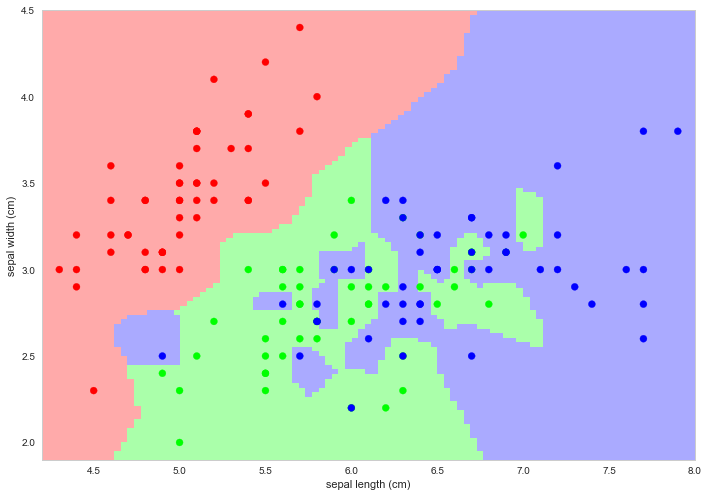

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.show()

Попробуйте поварьировать число K и обучить новые алгоритмы, посмотрев как меняются границы между классами.

Дополнительно нужно посчитать качество классификации - смотрите ноутбук classification.ipynb для примеров